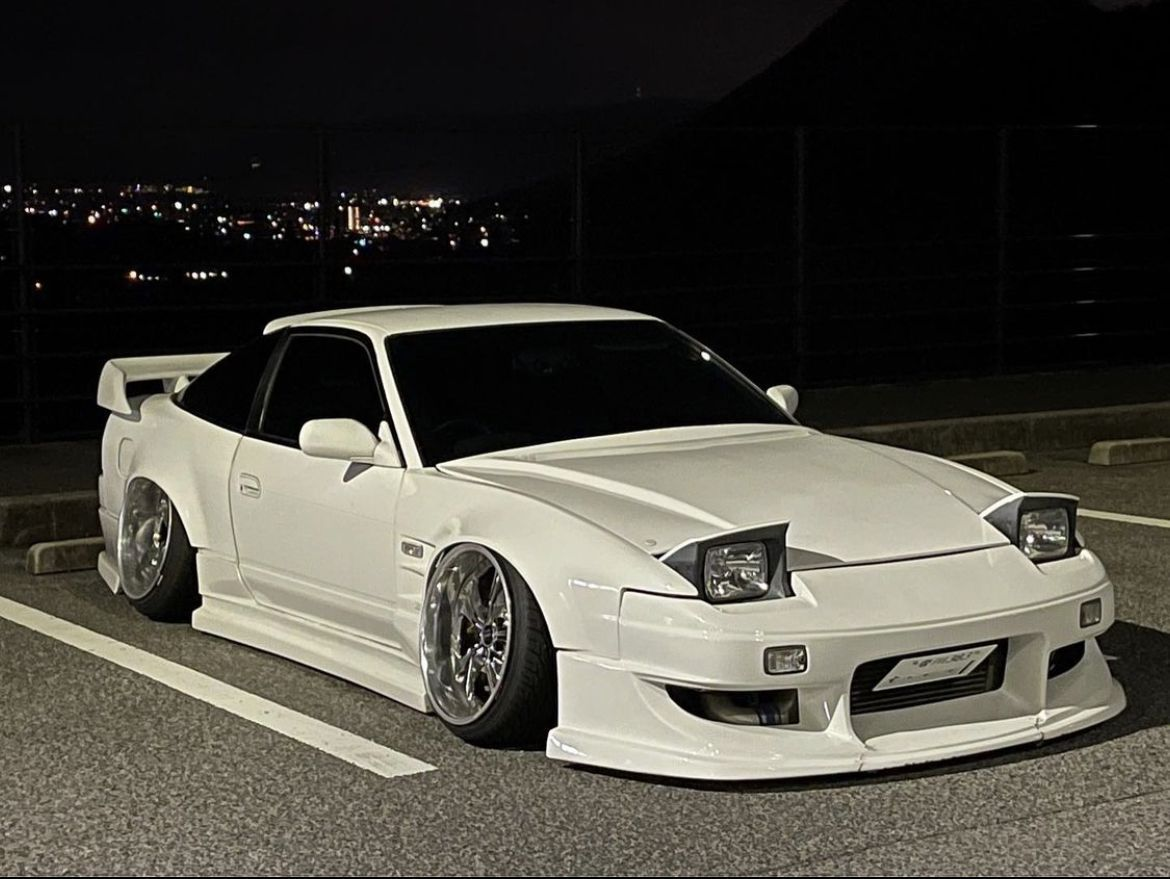

Car price prediction uses machine learning or statistical models to estimate a vehicle’s value based on features like make, model, year, mileage, and condition. Historical sales data from sources like auctions or online platforms trains these models. Algorithms like linear regression, random forests, or neural networks analyze numerical and categorical data, often incorporating market trends. Evolving from manual appraisals in the mid-20th century to data-driven methods since the 1990s, modern predictions leverage real-time data, despite challenges like data quality.

In [2]:
from zipfile import ZipFile as zp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

After importing necessary libraries, we should load our *Credit Card Dataset ( [kaggle dataset link](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction))*

In [6]:
dz = zp("/content/dataset.zip")
data = pd.read_csv(dz.open("CarPrice_Assignment.csv"))
data_copy = data.copy()

data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [7]:
data.shape

(205, 26)

Using "*.shape* " we can learn size of our  dataset (number of columns and rows)

In [10]:
# Rename and remove unnecasarry things

data['car_brand'] = data['CarName'].apply(lambda x: x.split()[0].lower())
data['car_brand'] = data['car_brand'].replace({
    'vw': 'volkswagen', 'vokswagen': 'volkswagen', 'porcshce': 'porsche', 'toyouta': 'toyota', 'maxda': 'mazda'})
data.drop(['car_ID', 'CarName'], axis = 1, inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [12]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
data.isnull().sum()

,0
symboling,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0
carlength,0
carwidth,0


Alternatively, we can use "*.isna().sum()* ", there is no difference between them.

Eventually, **we don't have any NULL values**.

<Axes: >

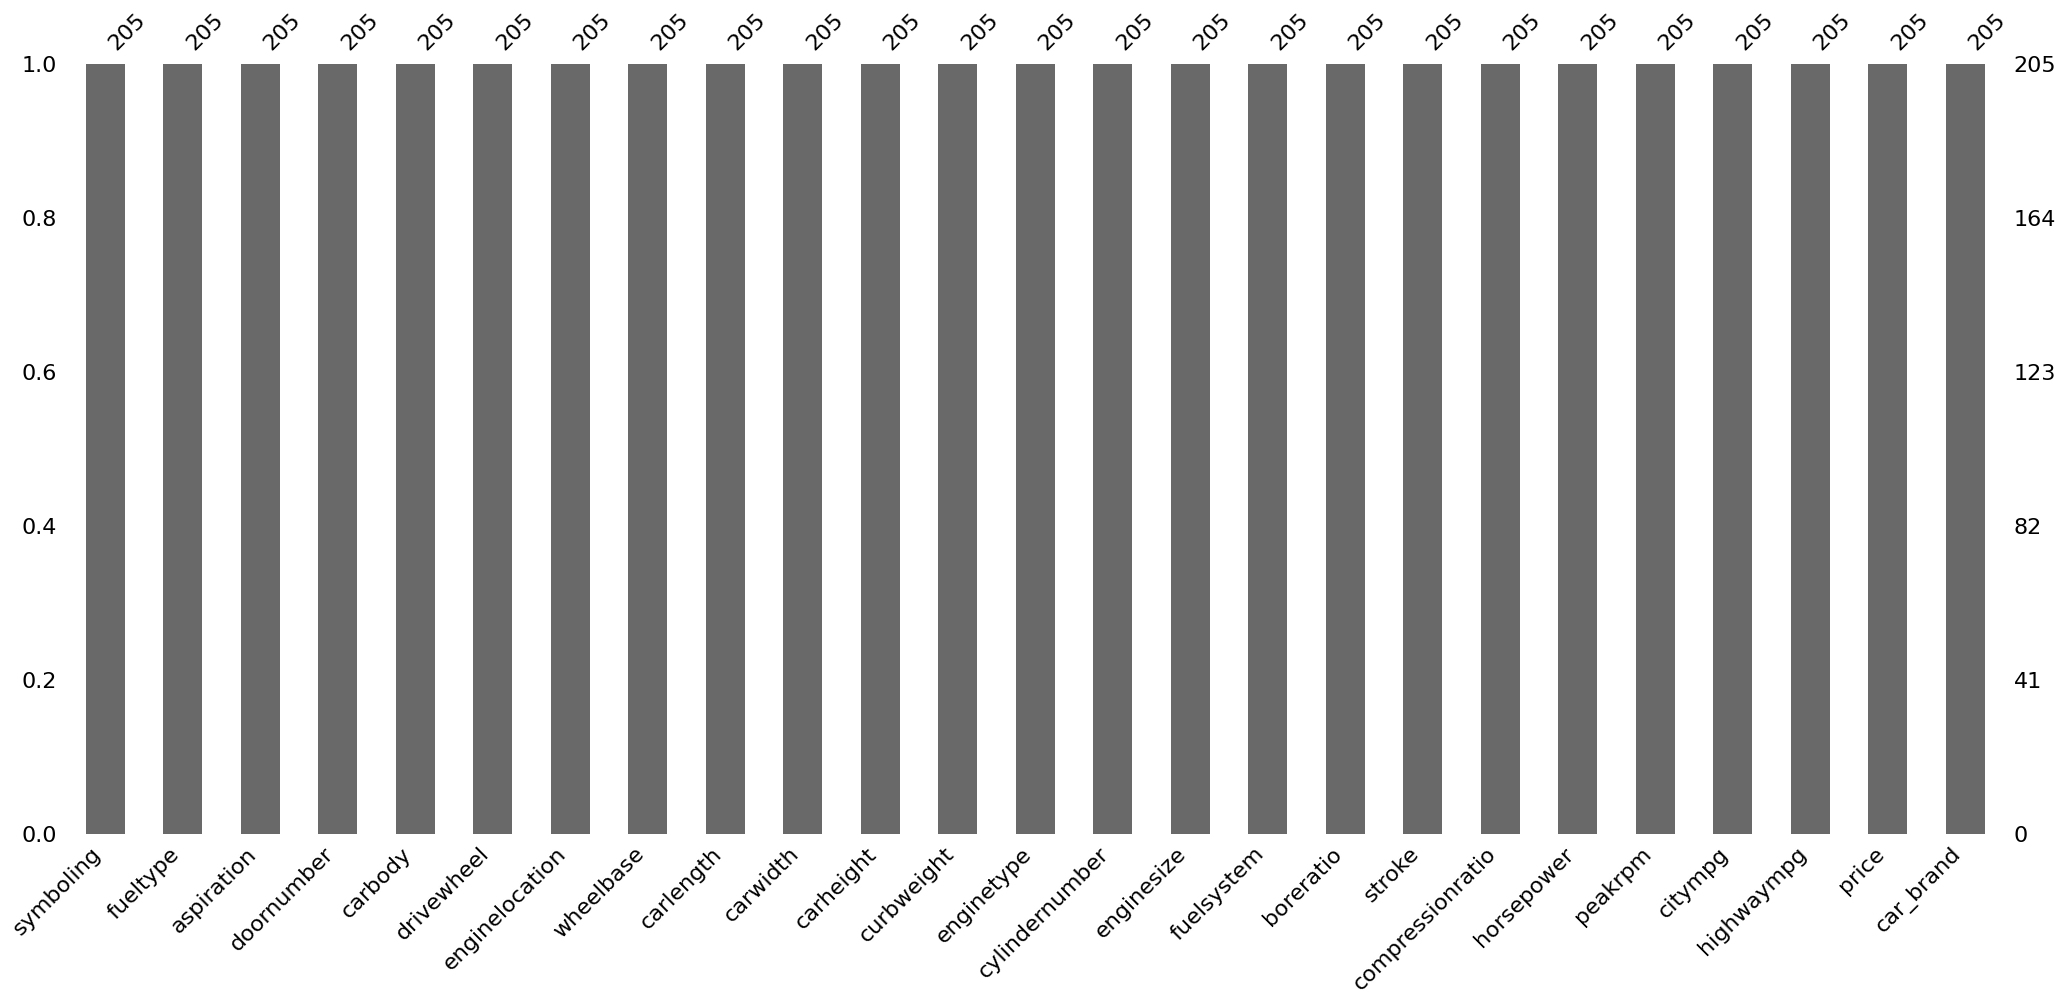

In [14]:
ms.bar(data)

*missingo* is a Python library used to quickly visualize and understand missing data patterns in a dataset through heatmaps, dendograms, bar charts, matrix plots, and so forth.

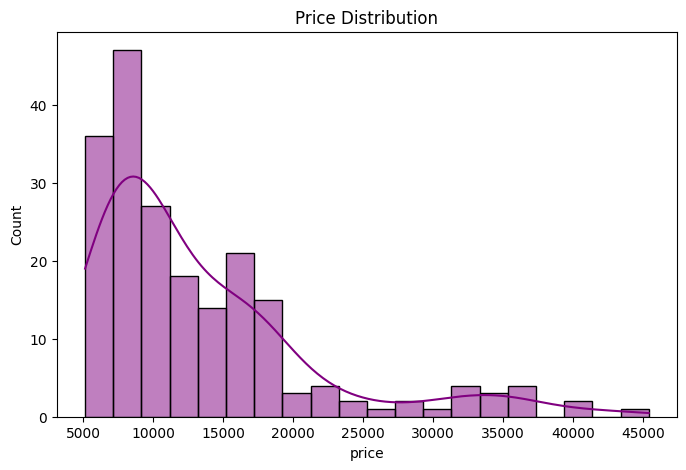

In [18]:
plt.figure(figsize = (8, 5))
sns.histplot(data['price'], kde = True, bins = 20, color = 'purple')
plt.title("Price Distribution")
plt.show()

A **histogram** is a graphical representation of the distribution of a dataset. It groups data into *intervals (bins)* and displays the *frequency (count)* of observations in each bin.

* **Mathematically**

Let $x = \{x_1, x_2, \dots, x_n\}$ be a set of numerical data.

1. *Bin intervals*: Divide the range of $x$ into $k$ intervals (bins):  $[a_0, a_1), [a_1, a_2), \dots, [a_{k-1}, a_k]$

2. *Frequency $f_i$*: For each bin $[a_{i-1}, a_i)$, count the number of observations that fall into the bin: $f_i = \text{number of } x_j \in [a_{i-1}, a_i)$

3. *Relative frequency*: $p_i = \frac{f_i}{n}$

4. *Histogram height*: The height of each bar corresponds to $f_i$ or $p_i$.

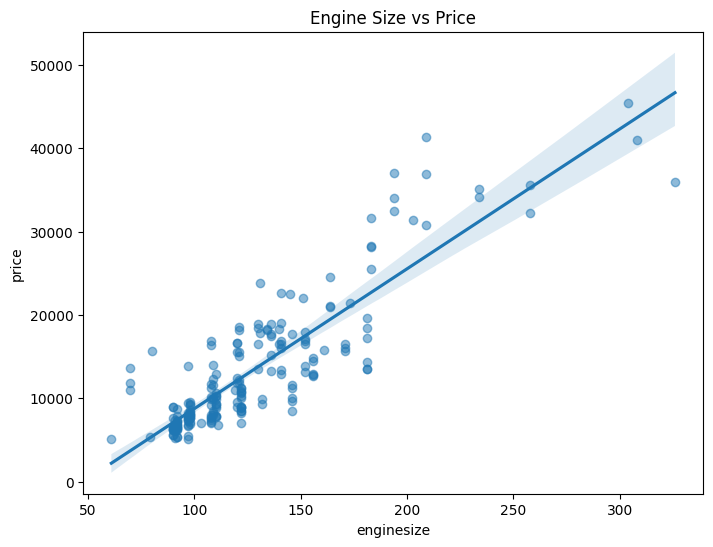

In [40]:
plt.figure(figsize = (8, 6))
sns.regplot(data = data, x = 'enginesize', y = 'price', scatter_kws = {'alpha': 0.5})
plt.title("Engine Size vs Price")
plt.show()

Regression plot is a function in the Seaborn library (a statistical data visualization library in Python) used to display a scatter plot of two variables along with a fitted regression line.

It is useful for visualizing the relationship between an independent variable (feature) and a dependent variable (target), particularly when you want to understand how well a linear regression model fits the data.

In [19]:
data = pd.get_dummies(data, drop_first = True)

# features and target
x = data.drop('price', axis = 1)
y = data['price']

# standardize
sc = StandardScaler()
x = sc.fit_transform(x)

# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

### **1) Converting Categorical Variables**

*get_dummies()* converts categorical variables into a set of binary (0/1) columns, which is essential for machine learning models that require numerical input. In addition, *drop_first = True* drops the first category to avoid redundancy.

### **2) Features and Target**

It is used to separate the dataset into **features** and **target**.

* `x` represents the **features**, which are the input variables used to make predictions. This is done by dropping the 'price' column from the dataset, meaning all columns except 'price' will be included in `x`.

* `y` represents the **target**, which is the output variable we want to predict. It is set as the 'price' column.

This separation is essential in supervised machine learning, where models learn patterns from the features to predict the target.

### **3) Scaling**

Scaling in ML is all about getting your data to play nice together so your model doesn't trip over numbers that are on totally different scales like height in CMs say 180 and weight in KGs say 80 without scaling big numbers can bully smaller ones in algorithms like KNN, SVM or neural networks because they rely on distances or gradients scaling makes sure every feature gets an equal shot so your model learns better and faster its super important for stuff like gradient descent where big differences in scale can slow things down or mess up results plus it keeps things fair so no feature dominates just cause its numbers are bigger you dont always need scaling though like with decision trees or random forests since they don't care about scale but for most other models its a must.

Now, let's talk two big scaling methods **MinMaxScaler and Z-score** standardization a.k.a StandardScaler;

** *MinMaxScaler* ** takes your data and squashes it into a set range usually 0 to 1 it works by taking each value subtracting the smallest value in the feature and dividing by the range which is max minus min the formula is x scaled equals $X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$* so if the heights are 170, 180, 190 the "min is 170",  "max is 190",  "range is 20". Thus,

* 180 => 180 minus 170 divided by 20 which is *0.5*
* 170 => 170 minus 170 divided by 20 which is *0.0*
* 190 => 190 minus 170 divided by 20 which is *1.0*

Eventually, this puts everything between 0 and 1 keeping the relative distances between values its great for models that like bounded data like NNs but watch out for outliers cause a crazy high or low value can squish everything else.

On the other hand, * **Z-score standardization or StandardScaler** * is different it makes your data have a mean of 0 and a standard deviation of 1 basically centering it around zero with a consistent spread the formula is, ($X_{\text{scaled}} = \frac{X - \mu}{\sigma}$). This method assumes your data is kinda normal bell curve ish and works awesome for algorithms like linear regression or SVM but outliers can mess with the mean and standard deviation so if your data’s wild you might need something else like RobustScaler.

* Mean: $\mu = \frac{180 + 170 + 190}{3} = 180$
* Std: $\sigma = \sqrt{\frac{(180-180)^2 + (170-180)^2 + (190-180)^2}{3}} = \sqrt{\frac{0 + 100 + 100}{3}} \approx 8$

Then;
* Z(180) => 180 minus 180 divided by 8 which is *0.0*
* Z(170) => 170 minus 180 divided by 8 which is *-1.2*
* Z(190) => 190 minus 180 divided by 8 which is *1.2*

Key points always scale after splitting your data into training and test sets to avoid data leakage where test info sneaks into training only fit your scaler on training data then use it to transform both training and test data MinMax is good for bounded ranges Z-score is better for normally distributed data if you got outliers RobustScaler might be your friend since it uses medians instead of means you can also reverse scaling to get back to original values which is handy for interpreting results.


### **4) Train and Test**

Initially, to evaluate how well a machine learning model performs, the dataset is typically divided into two parts, *training data* and *testing data*.

* `x_train` and `y_train`: used to **train** the model.
* `x_test` and `y_test`: used to **test** the model's performance on unseen data.
* `test_size=0.2` means **20% of the data** is used for testing, and the remaining **80% for training**.
* `random_state=42` is a fixed seed value to ensure the split is **reproducible**, the same split will occur every time you run the code.

This process helps us evaluate the model’s ability to generalize to new, unseen data and avoid overfitting.

In [24]:
# Linear Regression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
linear_pred = linear_model.predict(x_test)

r2_linear = r2_score(y_test, linear_pred)
rmse_linear = np.sqrt(mean_squared_error(y_test, linear_pred))

print(f"Linear Regression R²: {r2_linear:.3f}")
print(f"MSE: {rmse_linear:.2f}")

Linear Regression R²: 0.862
MSE: 2757.33


### **1) Linear Regression**

Linear regression is a supervised learning algorithm used to model the relationship between a dependent variable (target) and one or more independent variables (features). The goal is to find a linear function that best predicts the target variable based on the features.

*Formula:* $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \varepsilon$

In here,

* $y$ is the dependent variable (target),
* $x_1, x_2, \dots, x_p$ are the independent variables (features),
* $\beta_0$ is the intercept (constant term),
* $\beta_1, \beta_2, \dots, \beta_p$ are the coefficients (weights) for each feature,
* $\varepsilon$ is the error term (residual) capturing the difference between the observed and predicted values.

The model parameters $\beta$ are estimated by minimizing the **sum of squared residuals** (difference between observed and predicted values). This method is called **Ordinary Least Squares (OLS)**.

### **2) R² Score (Coefficient of Determination)**

The R² score measures how well the linear regression model explains the variability of the target variable. It is a statistical metric indicating the proportion of the variance in the dependent variable that is predictable from the independent variables.

*Formula:* $R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$

In here,

* $y_i$ is the actual value,
* $\hat{y}_i$ is the predicted value from the model,
* $\bar{y}$ is the mean of the actual values,
* $n$ is the number of observations.

Note,

* $R^2 = 1$ means the model perfectly explains the data (no residual errors).
* $R^2 = 0$ means the model does no better than simply predicting the mean of the target.
* Negative values can occur if the model fits worse than the mean.

### **3) Root Mean Squared Error (RMSE)**

RMSE is a commonly used metric to evaluate the performance of regression models. It represents the square root of the average of the squared differences between the actual and predicted values. RMSE measures how much, on average, the predictions deviate from the true values, expressed in the same units as the target variable.

*Formula:* $\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 }$

In here,

* $y_i$ is the actual value,
* $\hat{y}_i$ is the predicted value,
* $n$ is the number of observations.

In [25]:
# Ridge

ridge = Ridge(alpha = 1.0)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)

r2_ridge = r2_score(y_test, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_pred))

print(f"Ridge Regression R²: {r2_ridge:.3f}")
print(f"RMSE: {rmse_ridge:.2f}")

Ridge Regression R²: 0.869
RMSE: 2684.92


### **Ridge Regression (L2 Regularization)**

Firstly, regularization is a technique used in machine learning to prevent **overfitting** by adding a penalty term to the loss function during model training. Overfitting happens when a model fits the training data too closely, capturing noise instead of the true underlying pattern, which harms its performance on new data. Mathematically, regularization modifies the original loss function (e.g., the sum of squared errors in linear regression) by adding a penalty based on the magnitude of the model coefficients. So, this penalty discourages complex models by shrinking the coefficients towards zero, improving generalization.

In that case, *ridge* regression adds a penalty proportional to the **square of the magnitude** of coefficients to the loss function.

*Formula:* $J(\beta) = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p \beta_j^2$

In here,

* $y_i$ are actual values,
* $\hat{y}_i$ are predicted values,
* $\beta_j$ are model coefficients,
* $\lambda \geq 0$ is the regularization parameter controlling the strength of the penalty,
* $p$ is the number of features.

In [26]:
# Lasso

lasso = Lasso(alpha = 1.0)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)

r2_lasso = r2_score(y_test, lasso_pred)
rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso_pred))

print(f"Lasso Regression R²: {r2_lasso:.3f}")
print(f"RMSE: {rmse_lasso:.2f}")

Lasso Regression R²: 0.846
RMSE: 2907.98


### **Lasso Regression (L1 Regularization)**

Lasso regression adds a penalty proportional to the **absolute value** of the magnitude of coefficients.

*Formula:* $-J(\beta) = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p |\beta_j|$

In here,

* $y_i$ are actual values,
* $\hat{y}_i$ are predicted values,
* $\beta_j$ are model coefficients,
* $\lambda \geq 0$ is the regularization parameter controlling the strength of the penalty,
* $p$ is the number of features.

In [28]:
# Hyperparameter tuning (Ridge & Lasso)

ridge_params = {'alpha': np.logspace(-3, 3, 50)}
lasso_params = {'alpha': np.logspace(-3, 3, 50)}

ridge_cv = GridSearchCV(ridge, ridge_params, cv = 5)
ridge_cv.fit(x_train, y_train)

lasso_cv = GridSearchCV(lasso, lasso_params, cv = 5)
lasso_cv.fit(x_train, y_train)

print(f"Best Ridge alpha: {ridge_cv.best_params_['alpha']}")
print(f"Best Lasso alpha: {lasso_cv.best_params_['alpha']}")

Best Ridge alpha: 8.286427728546842
Best Lasso alpha: 4.714866363457395


In [29]:
# Evaluate the best models

best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_

best_ridge_pred = best_ridge.predict(x_test)
best_lasso_pred = best_lasso.predict(x_test)

print(f"Ridge R²: {r2_score(y_test, best_ridge_pred):.3f}")
print(f"Lasso R²: {r2_score(y_test, best_lasso_pred):.3f}")

Ridge R²: 0.868
Lasso R²: 0.844


### **Hyperparameter Tuning**

In machine learning, **hyperparameters** are settings or configurations that control the behavior of a learning algorithm but are **not learned from the data** directly. It is the process of searching for the best combination of hyperparameters that allows the model to perform optimally on unseen data.

* Theoretical Explanation:

* Unlike model parameters (like weights in linear regression) that are learned during training by minimizing a loss function, hyperparameters must be set **before** training starts.
* The choice of hyperparameters can significantly impact the model’s accuracy, generalization ability, and training efficiency.
* The goal of hyperparameter tuning is to find the hyperparameters that minimize the model’s **generalization error**, i.e., the error on unseen data.

Mathemacially, suppose a model is defined by parameters $\theta$ (learned from data) and hyperparameters $\lambda$ (set manually).

* Training the model is finding:

*Formual:* $\hat{\theta}(\lambda) = \arg\min_\theta L(\theta; \lambda)$

In here, $L$ is the loss function (e.g., mean squared error).

* Hyperparameter tuning is finding the hyperparameter values $\lambda^*$ that minimize the validation error $E_{val}$:

*Formula:* $\lambda^* = \arg\min_\lambda E_{val}(\hat{\theta}(\lambda))$

In here, $E_{val}$ measures how well the trained model with parameters $\hat{\theta}(\lambda)$ performs on validation data.

* **Methods**:

* **Grid Search:** Exhaustively tries all combinations of specified hyperparameter values.
* **Random Search:** Tries random combinations of hyperparameters.
* **Bayesian Optimization:** Uses probabilistic models to select promising hyperparameters.
* **Cross-Validation:** Often combined with the above methods to reliably estimate performance.

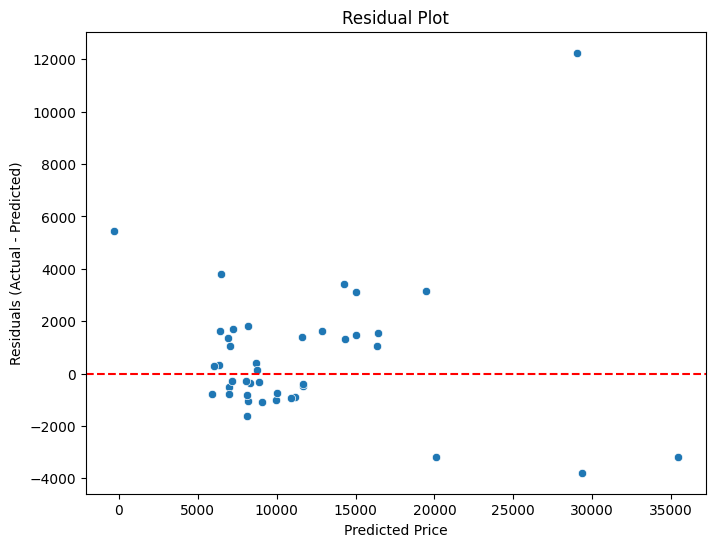

In [39]:
# Ridge model is the best one with 86.9%

residuals = y_test - ridge_pred

plt.figure(figsize = (8,6))
sns.scatterplot(x = ridge_pred, y = residuals)
plt.axhline(0, color = 'red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

In conclusion, we developed an end-to-end car price prediction model using various linear regression techniques, including regularized models like **Ridge** and **Lasso**. The pipeline included comprehensive data preprocessing, exploratory visual analysis, feature encoding, scaling, model training, hyperparameter tuning, and model evaluation.

Notes;

* The **baseline Linear Regression** model achieved an **R² score of 86.2%**, indicating that it explains a large proportion of the variance in car prices.
* The **Ridge Regression** model slightly outperformed the baseline with an **R² score of 86.9%**, suggesting that L2 regularization helped reduce overfitting by penalizing large coefficients.
* After **hyperparameter tuning**, the Ridge model slightly declined to **86.8%**, but remained the top performer, confirming its robustness.
* The **Lasso Regression** model initially scored **84.6%**, and **84.4% after tuning**, showing that L1 regularization was slightly less effective for this dataset, possibly due to the importance of all features in prediction.

Overall, the **Ridge Regression** model, with appropriate regularization and tuning, delivered the **best predictive performance** among the tested algorithms. This result highlights the value of regularization in controlling overfitting while retaining strong generalization capabilities.

In [41]:
# Finally

***I WOULD LIKE TO EXPRESS MY SINCERE GRATITUDE FOR YOUR TIME AND CONSIDERATION***

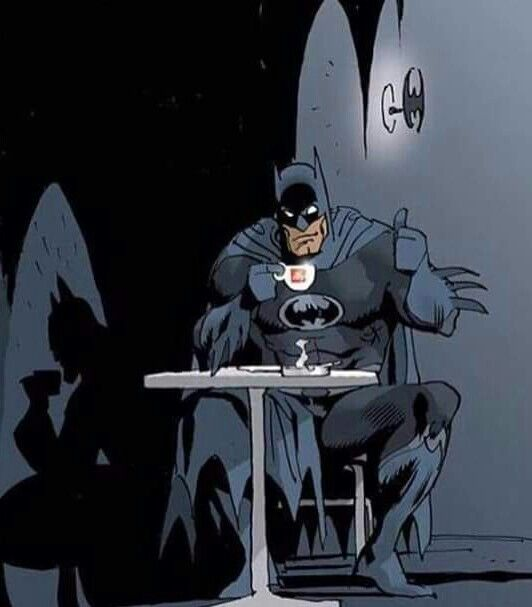